In [2]:
import numpy as np
import matplotlib.pyplot as plt

/tmp/ipykernel_7920/1900596108.py:46: UserWarning: Glyph 12469 (\N{KATAKANA LETTER SA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_7920/1900596108.py:46: UserWarning: Glyph 12531 (\N{KATAKANA LETTER N}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_7920/1900596108.py:46: UserWarning: Glyph 12503 (\N{KATAKANA LETTER PU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_7920/1900596108.py:46: UserWarning: Glyph 12523 (\N{KATAKANA LETTER RU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_7920/1900596108.py:46: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_7920/1900596108.py:46: UserWarning: Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_7920/1900596108.py:46: UserWarning: Glyph 22343 (\N{CJK UNIFIED IDEOGRAPH-5747}) missing from font(s) DejaVu San

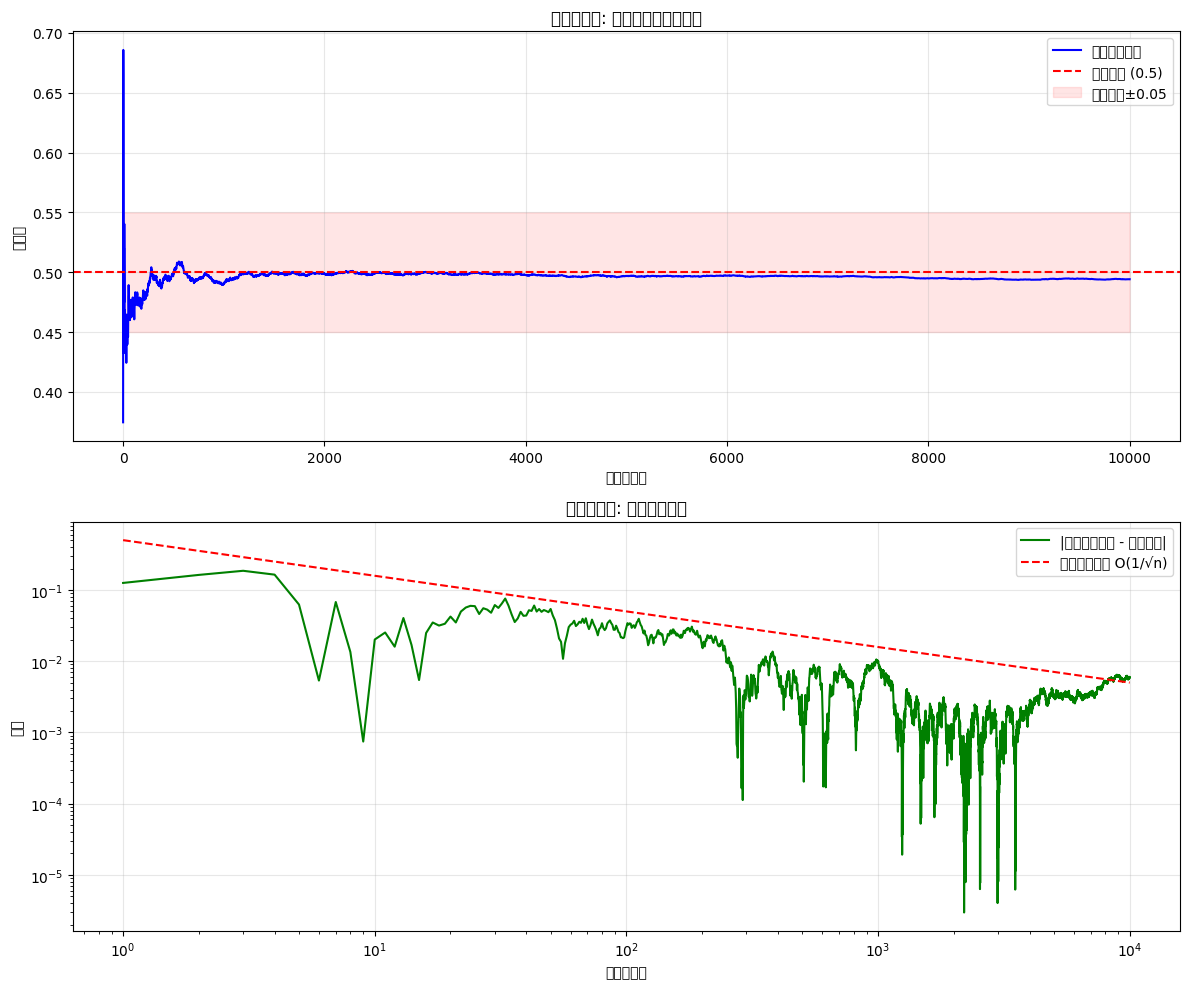

/usr/local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12514 (\N{KATAKANA LETTER MO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12486 (\N{KATAKANA LETTER TE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12459 (\N{KATAKANA LETTER KA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12525 (\N{KATAKANA LETTER RO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12395 (\N{HIRAGANA LETTER NI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local

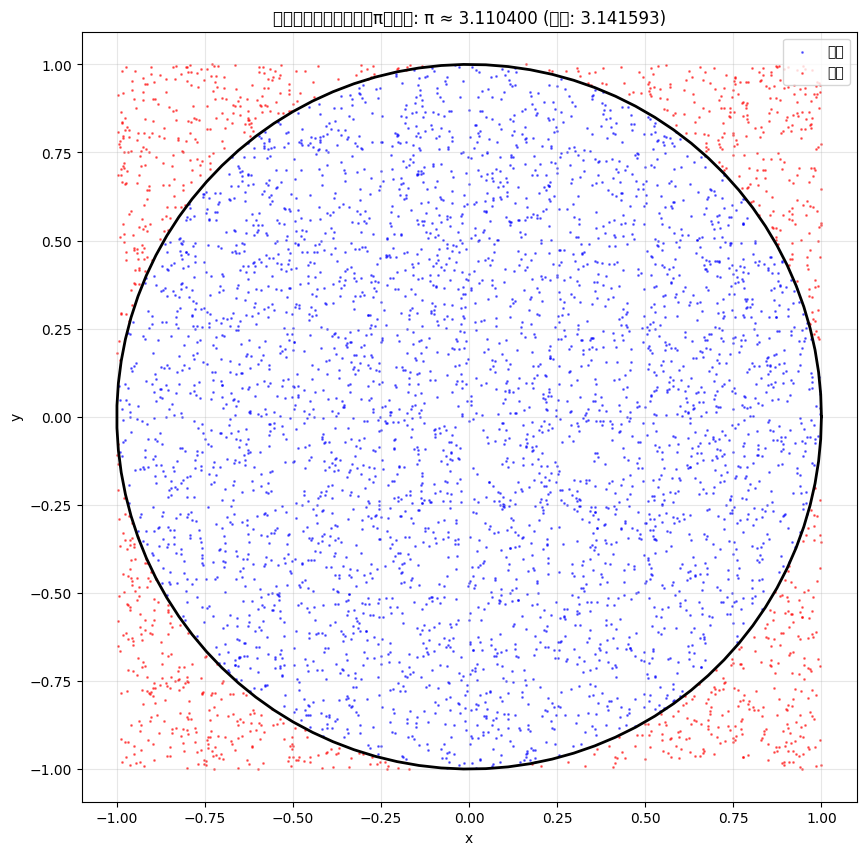

/usr/local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12452 (\N{KATAKANA LETTER I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12474 (\N{KATAKANA LETTER ZU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


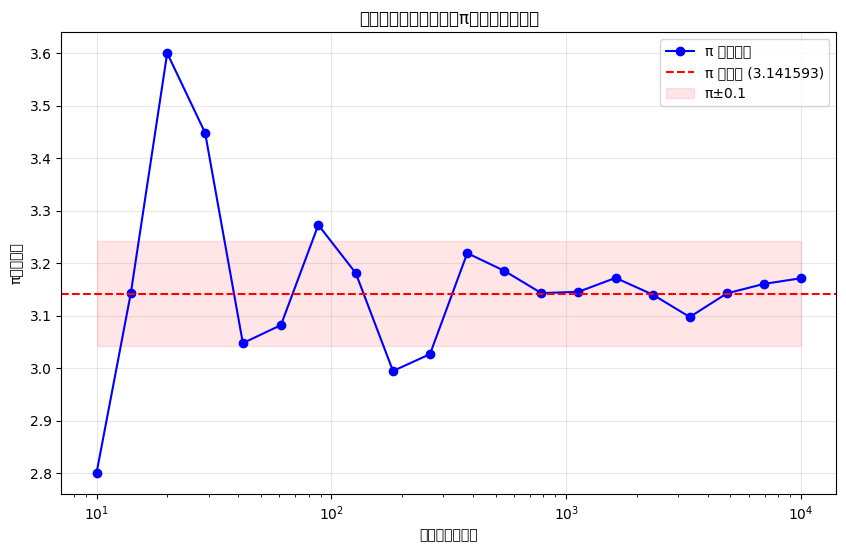

In [3]:

# ======== 大数の法則のデモンストレーション ========
# 大数の法則: サンプルサイズが大きくなるほど、標本平均が母平均に近づく性質

# パラメータ設定
np.random.seed(42)  # 再現性のための乱数シード設定
max_samples = 10000  # 最大サンプル数
true_mean = 0.5     # 一様分布 U(0,1) の理論平均値

# サンプルを生成
samples = np.random.uniform(0, 1, max_samples)

# 累積平均を計算
sample_means = np.cumsum(samples) / np.arange(1, max_samples + 1)

# 理論値との差（誤差）を計算
error = np.abs(sample_means - true_mean)

# ======== 大数の法則の可視化 ========
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# サンプル平均の推移
ax1.plot(range(1, max_samples + 1), sample_means, label='サンプル平均', color='blue')
ax1.axhline(y=true_mean, color='r', linestyle='--', label=f'理論平均 ({true_mean})')
ax1.set_title('大数の法則: サンプル平均の収束')
ax1.set_xlabel('サンプル数')
ax1.set_ylabel('平均値')
# 理論平均の周りに範囲を表示
ax1.fill_between(range(1, max_samples + 1), 
                true_mean - 0.05, true_mean + 0.05, 
                color='red', alpha=0.1, label='理論平均±0.05')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 対数スケールでの誤差の減少
ax2.loglog(range(1, max_samples + 1), error, label='|サンプル平均 - 理論平均|', color='green')
# 理論的に期待される収束率 O(1/√n)
theoretical_rate = 0.5 / np.sqrt(np.arange(1, max_samples + 1))
ax2.loglog(range(1, max_samples + 1), theoretical_rate, 'r--', 
           label='理論的収束率 O(1/√n)')
ax2.set_title('誤差の収束: 対数スケール')
ax2.set_xlabel('サンプル数')
ax2.set_ylabel('誤差')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ======== モンテカルロ法による円周率の推定 ========
# モンテカルロ法: 乱数を用いて数値積分や確率計算を行う手法
# ここでは単位正方形内のランダムな点が単位円に入る確率から円周率πを推定

def estimate_pi(n_samples):
    """
    モンテカルロ法によるπの推定
    """
    # [-1,1]×[-1,1]の正方形内にランダムな点を生成
    x = np.random.uniform(-1, 1, n_samples)
    y = np.random.uniform(-1, 1, n_samples)
    
    # 各点の原点からの距離を計算
    distances = np.sqrt(x**2 + y**2)
    
    # 単位円内に入る点の数を数える
    points_inside_circle = np.sum(distances <= 1)
    
    # π = 4 * (単位円内の点の数) / (全点の数)
    pi_estimate = 4 * points_inside_circle / n_samples
    
    return pi_estimate, x, y, distances

# サンプル数
n_samples = 5000

# πを推定
pi_estimate, x, y, distances = estimate_pi(n_samples)

# 結果の可視化
plt.figure(figsize=(10, 10))

# 単位円を描く
theta = np.linspace(0, 2*np.pi, 100)
circle_x = np.cos(theta)
circle_y = np.sin(theta)
plt.plot(circle_x, circle_y, 'k-', linewidth=2)

# 点をプロット（青: 円内、赤: 円外）
inside_circle = distances <= 1
plt.scatter(x[inside_circle], y[inside_circle], color='blue', s=1, alpha=0.5, label='円内')
plt.scatter(x[~inside_circle], y[~inside_circle], color='red', s=1, alpha=0.5, label='円外')

# グラフの設定
plt.axis('equal')
plt.title(f'モンテカルロ法によるπの推定: π ≈ {pi_estimate:.6f} (真値: {np.pi:.6f})')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True, alpha=0.3)
plt.legend()

plt.show()

# πの推定値の収束を確認
sample_sizes = np.logspace(1, 4, 20).astype(int)  # 10から10000までの対数間隔のサンプルサイズ
pi_estimates = []

for n in sample_sizes:
    pi_est, _, _, _ = estimate_pi(n)
    pi_estimates.append(pi_est)

# 収束の可視化
plt.figure(figsize=(10, 6))
plt.semilogx(sample_sizes, pi_estimates, 'bo-', label='π の推定値')
plt.axhline(y=np.pi, color='r', linestyle='--', label=f'π の真値 ({np.pi:.6f})')
plt.fill_between(sample_sizes, np.pi - 0.1, np.pi + 0.1, color='red', alpha=0.1, label='π±0.1')
plt.title('サンプルサイズによるπの推定値の収束')
plt.xlabel('サンプルサイズ')
plt.ylabel('πの推定値')
plt.grid(True, alpha=0.3)
plt.legend()

plt.show()